In [2]:
from os import listdir
from os.path import abspath, isfile, join
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_bar, aes, scale_x_discrete, theme, element_text, scale_y_discrete, \
	scale_x_continuous, labs, scale_y_continuous, geom_line, geom_histogram

path = "C:/Nitsan/third/JavaAnalyzer"
files = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".csv")]
word_analysis_files = [f for f in files if f.startswith("analyzerResults_words_")]
word_lengths_analysis_files = [f for f in files if f.startswith("analyzerResults_lengths_")]

In [2]:
all_frequencies = pd.read_csv(abspath(join(path, 'analyzerResults_words_ALL.csv')))
filtered_out_words = all_frequencies[np.where(all_frequencies['external'] == 1, True, False)]['word']
print("Filtered out words:")
print("\n".join(filtered_out_words.values.tolist()))

Filtered out words:
T
String
R
Object
Throwable
requireNonNull
IOException
Integer
Class
List
com
java
K
serialVersionUID
V
AtomicReference
Long
toString
Map
Type
InterruptedException
Collection
Iterable
InputStream
ArrayList
Math
Set
Arrays
OutputStream
Boolean
AtomicLong
Collections
NullPointerException
AtomicInteger
RuntimeException
HashMap
AtomicThrowable
AtomicBoolean
Double
trim
Float
main


In [3]:
def graph_n_most_frequent_words(df, n, title):
	"""
	:param df: The dataframe, containing a "word" column and an "occurrences" column.
	:param n: parameter for n-most frequent words
	:param title: the graph title
	"""
	df = df.nlargest(n, 'occurrences')
	print(
		ggplot(df)
		+ labs(x=str(n) +" Most frequent words", y="Occurrences in project", title=title)
		+ scale_x_discrete(limits=df['word'].tolist())
		+ geom_bar(aes(x='word', y='occurrences'), stat='identity', fill='blue')
		+ theme(axis_text_x=element_text(rotation=90))
	)
	print("/n")

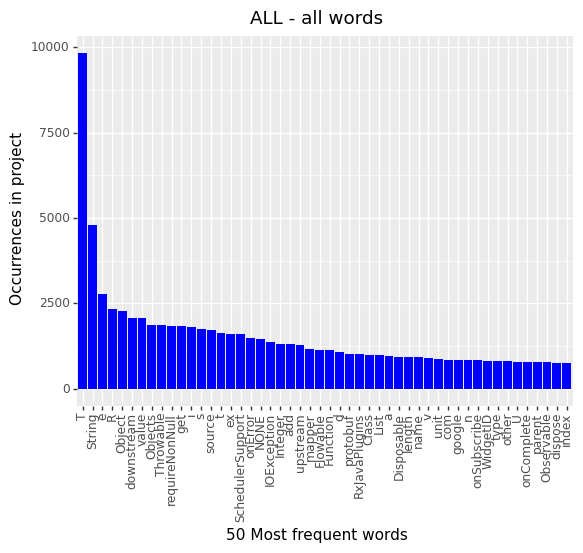

<ggplot: (153250927520)>
/n
<ggplot: (153251307545)>
/n
<ggplot: (153250927397)>
/n
<ggplot: (153251632749)>
/n
<ggplot: (153198296369)>
/n
<ggplot: (153251695731)>
/n
<ggplot: (153251713814)>
/n
<ggplot: (153251634845)>
/n
<ggplot: (153252104714)>
/n
<ggplot: (153251172861)>
/n
<ggplot: (153251713886)>
/n
<ggplot: (153252939430)>
/n
<ggplot: (153251219706)>
/n
<ggplot: (153252499719)>
/n


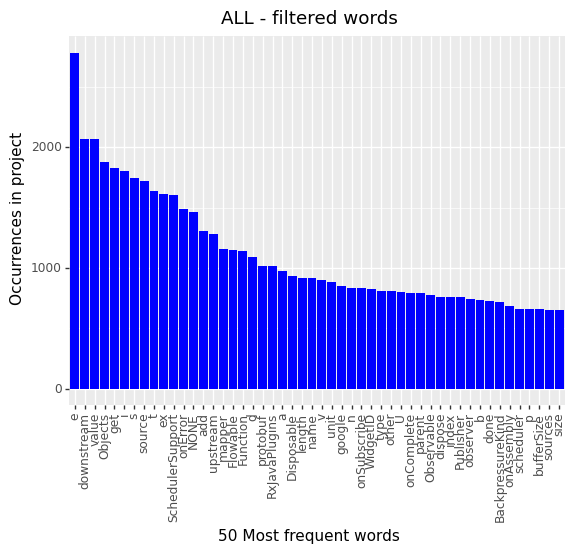

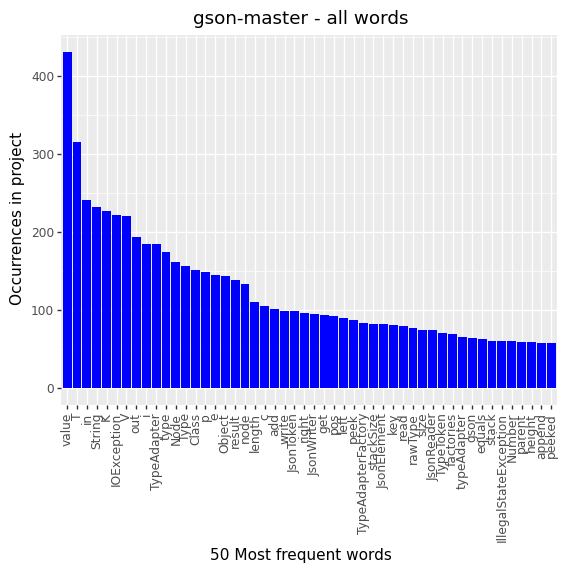

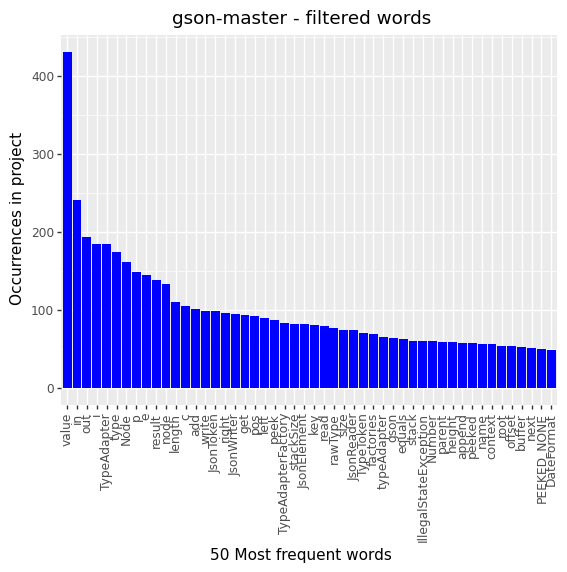

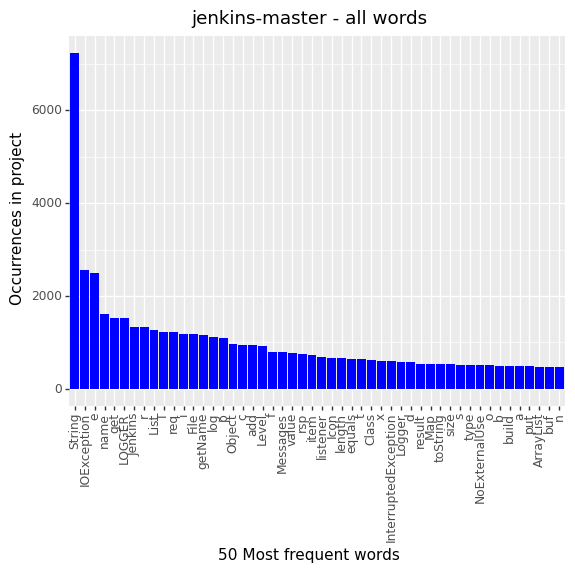

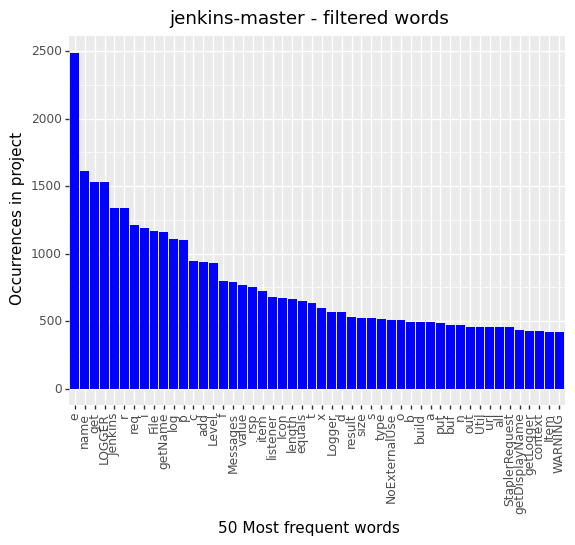

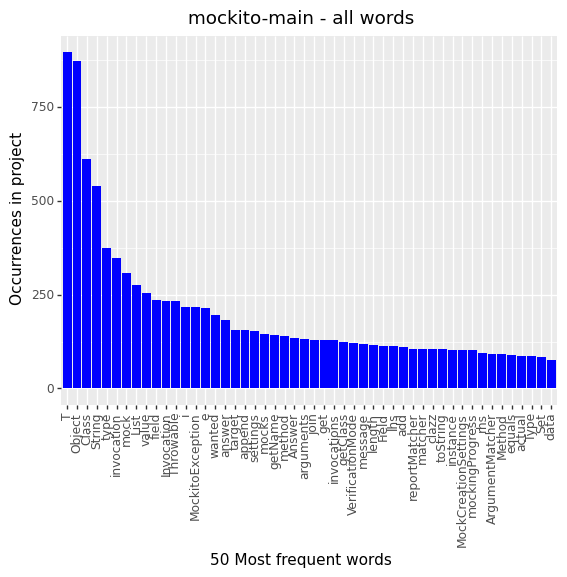

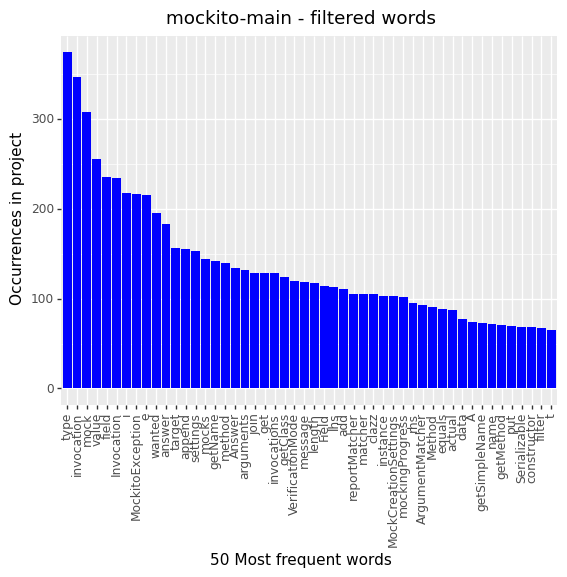

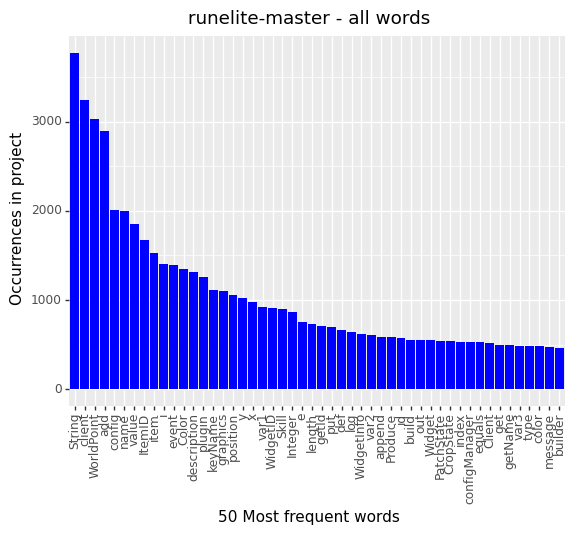

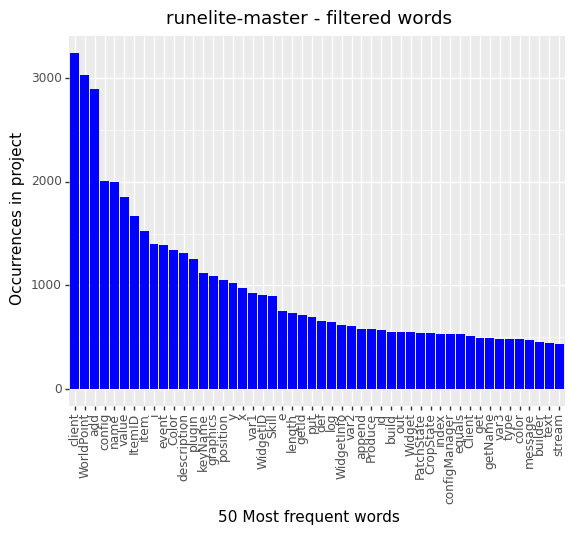

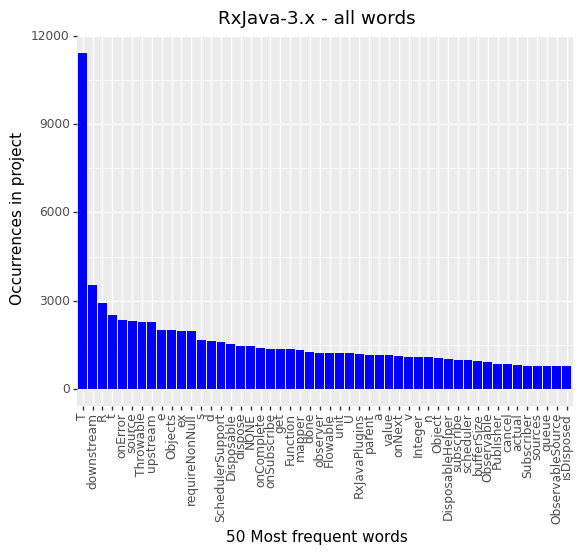

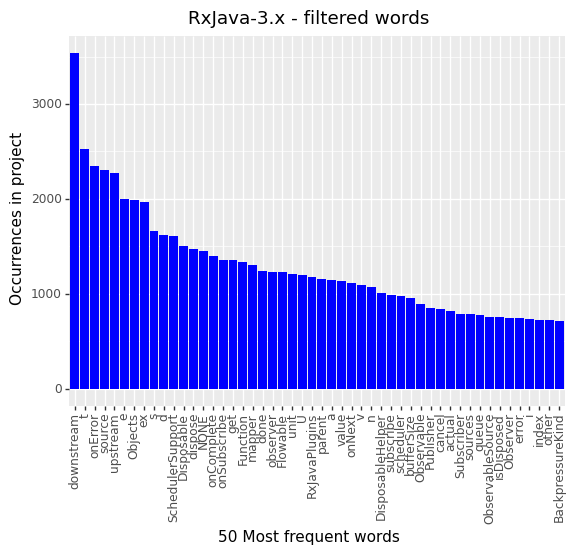

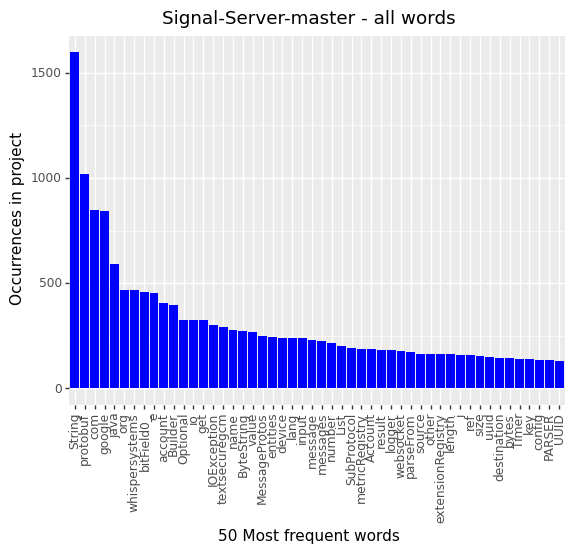

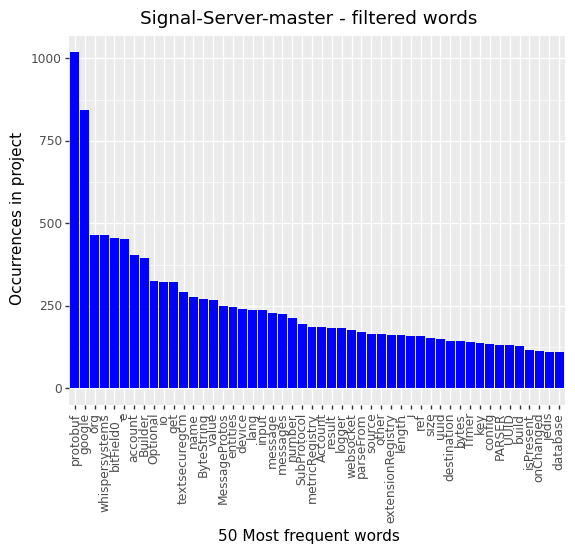

In [4]:
# Print the 50 most frequent words in each project and in total.
# Prints every graph twice - one with all the words, and once with the external vocabulary omitted.
for file in word_analysis_files:
	csv = pd.read_csv(abspath(join(path, file)))
	filtered_words = csv[~csv['word'].isin(filtered_out_words)]

	graph_n_most_frequent_words(csv, 50, file[22:-4] + " - all words")
	graph_n_most_frequent_words(filtered_words, 50, file[22:-4]+" - filtered words")

c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:433: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
  data = self.position.setup_data(self.data, params)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:433: PlotnineWarning: position_stack : Removed 8 rows co

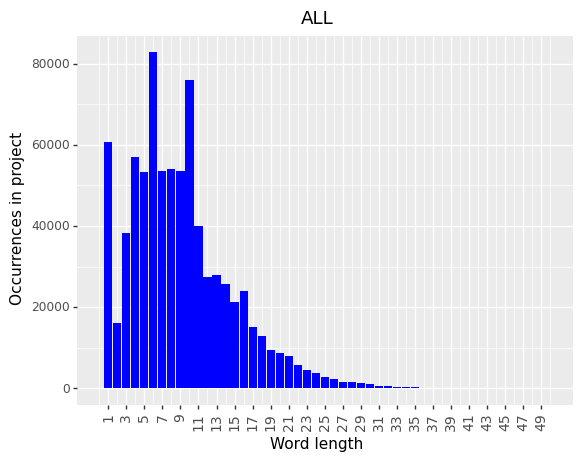

<ggplot: (135110079010)>
/n
<ggplot: (135109135135)>
/n
<ggplot: (135108903370)>
/n
<ggplot: (135109062280)>
/n
<ggplot: (135108357021)>
/n
<ggplot: (135108964717)>
/n
<ggplot: (135108835154)>
/n


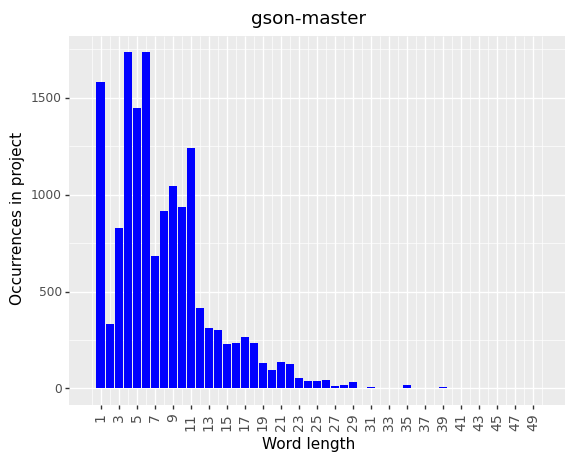

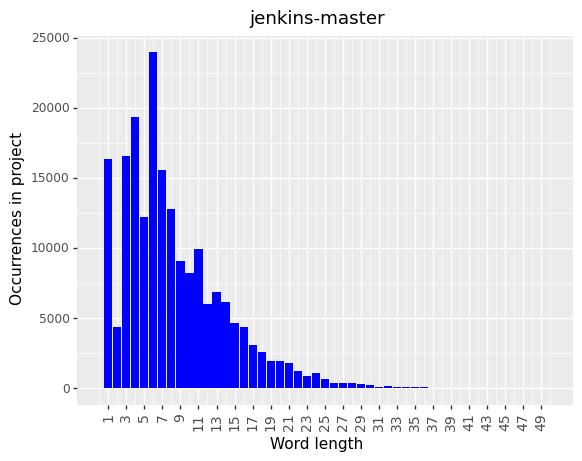

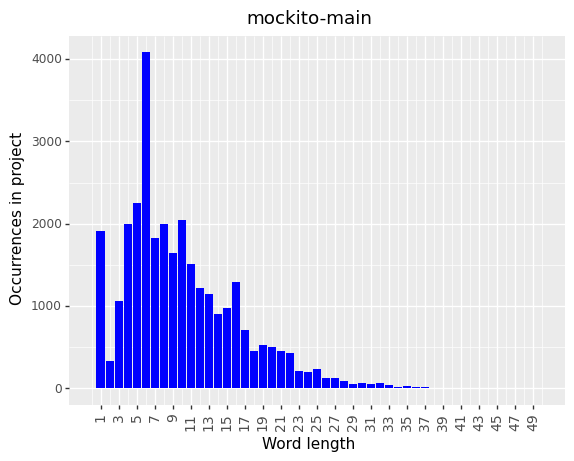

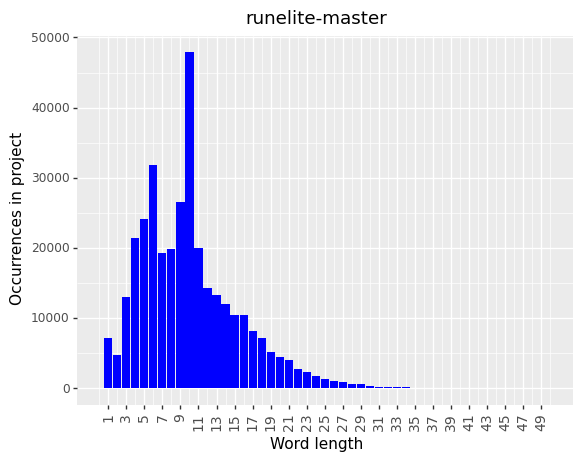

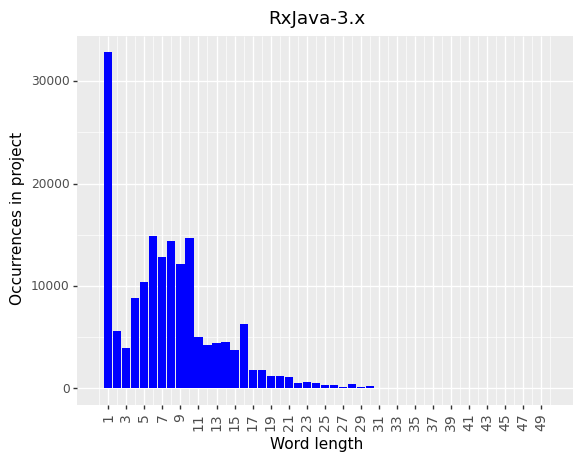

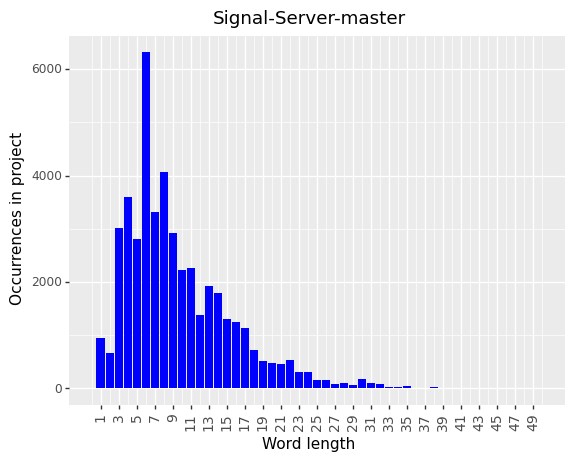

In [5]:
# Print the occurrences of word lengths between 0-50, in each project and in total.
for file in word_lengths_analysis_files:
	k = 50
	csv = pd.read_csv(abspath(join(path, file)))
	csv = csv.nsmallest(k, 'word_length')

	print(
		ggplot(csv)
		+ labs(x="Word length", y="Occurrences in project", title=file[24:-4])
		+ scale_x_continuous(limits=(0, k), breaks=range(1, k+1, 2))
		+ geom_bar(aes(x='word_length', y='occurrences'), stat='identity', fill='blue')
		+ theme(axis_text_x=element_text(rotation=90, size='10'))
	)
	print("/n")

In [6]:
# Prints the frequency of each word in the corpus, divided by the frequency of the most common word
def most_frequent_words_normalized(df, title, log_scale = True, n = None):
	if n is not None:
		df = df.nlargest(n, 'occurrences')
	most_frequent_word_occurrences = int(df[:1]['occurrences'])

	df['frequency'] = df['occurrences'] / most_frequent_word_occurrences
	data_length = n or df.shape[0]
	df['rank'] = np.linspace(1, data_length, data_length)

	graph = ggplot(df) \
			+ labs(x="rank",
				   y="frequency in project",
				   title=title)\
			+ geom_line(aes(x='rank', y='frequency'), stat='identity')\
			+ theme(axis_text_x=element_text(rotation=90))
	if log_scale:
		graph = graph \
				+ labs(x="log(rank)",
				   y="log(frequency in project)",
				   title=title)\
				+ scale_x_continuous(trans = 'log2') + scale_y_continuous(trans = 'log2')
	print(graph)
	print("/n")

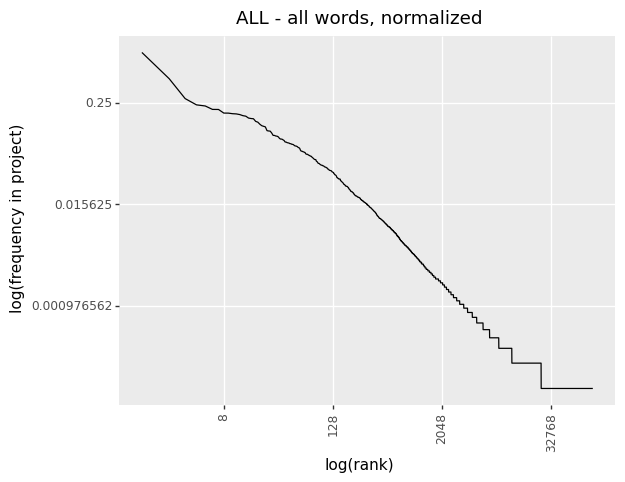

<ggplot: (135108702389)>
/n
<ggplot: (135109270857)>
/n
<ggplot: (135108724432)>
/n
<ggplot: (135108321512)>
/n
<ggplot: (135109823955)>
/n
<ggplot: (135108321371)>
/n
<ggplot: (135109594456)>
/n
<ggplot: (135109587984)>
/n
<ggplot: (135110177922)>
/n
<ggplot: (135109320430)>
/n
<ggplot: (135110071860)>
/n
<ggplot: (135109146501)>
/n
<ggplot: (135110087494)>
/n
<ggplot: (135108874286)>
/n


<ipython-input-6-f6fd31e817a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frequency'] = df['occurrences'] / most_frequent_word_occurrences
<ipython-input-6-f6fd31e817a6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = np.linspace(1, data_length, data_length)
<ipython-input-6-f6fd31e817a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

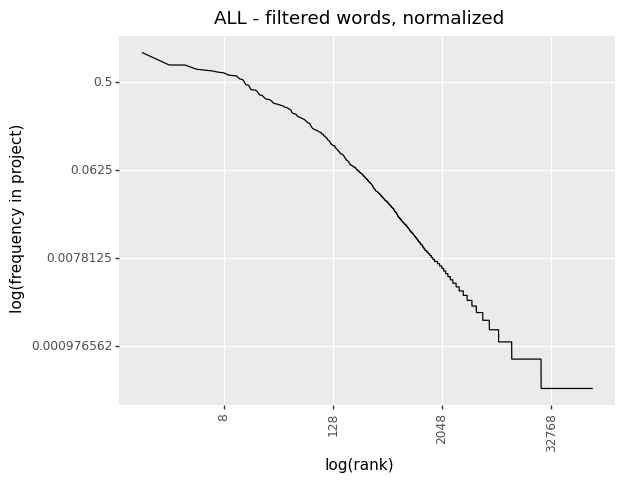

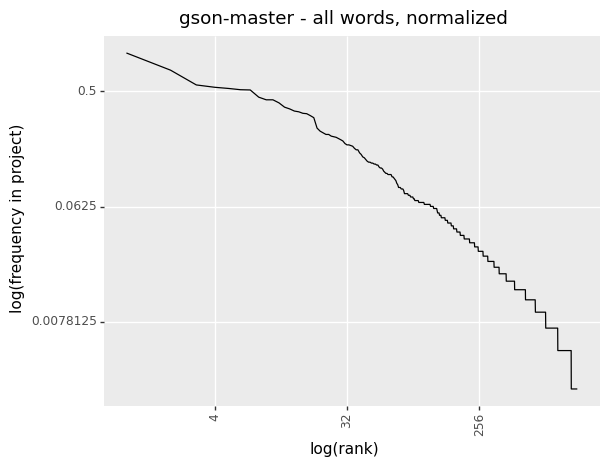

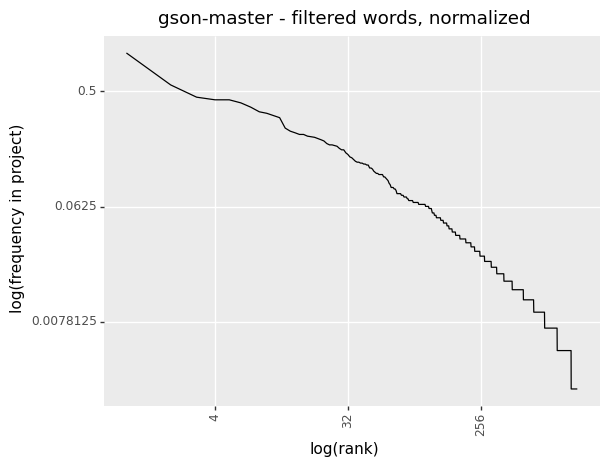

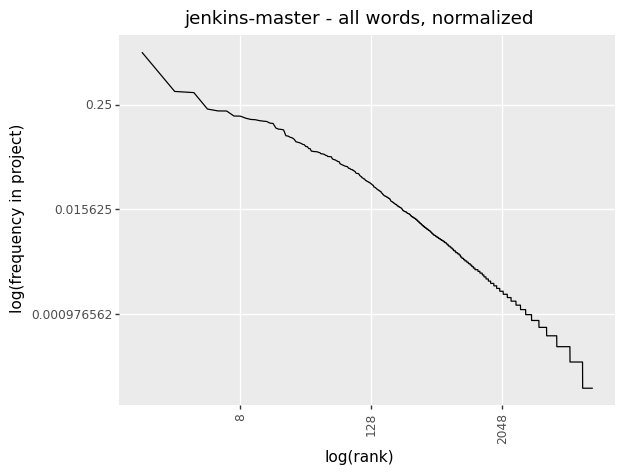

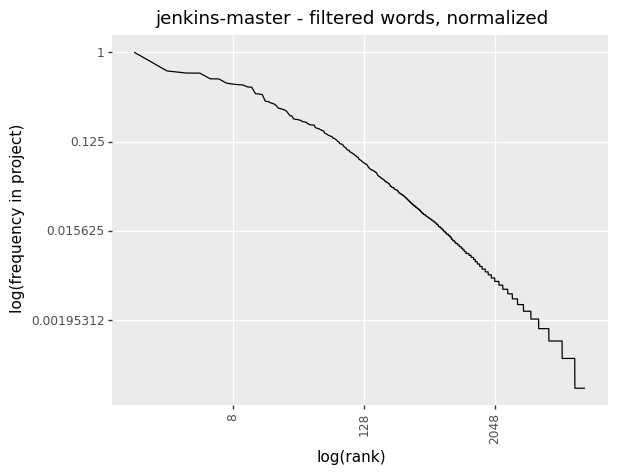

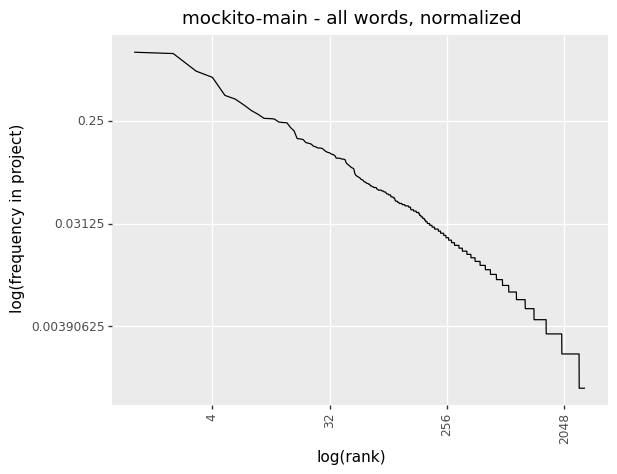

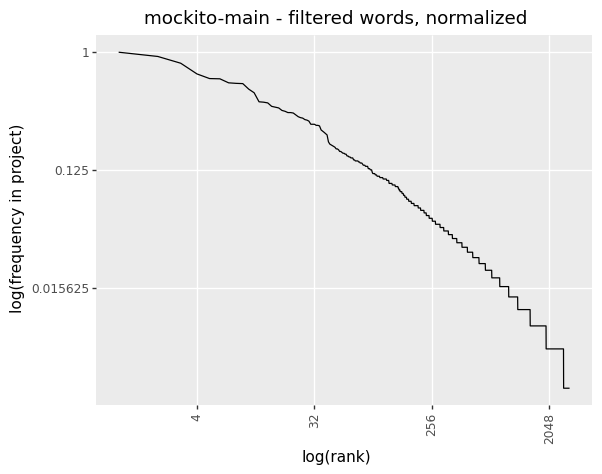

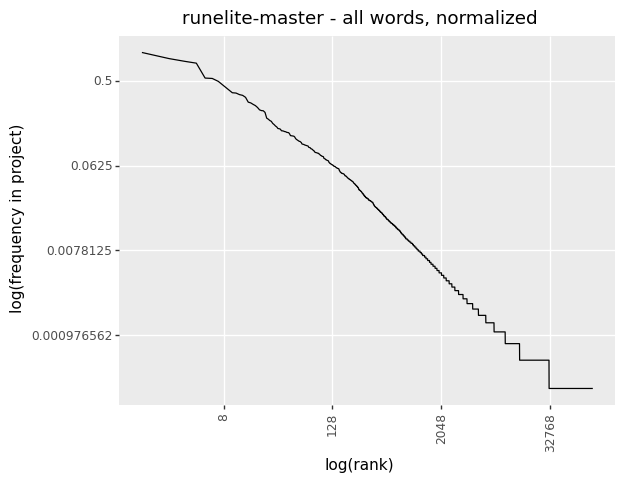

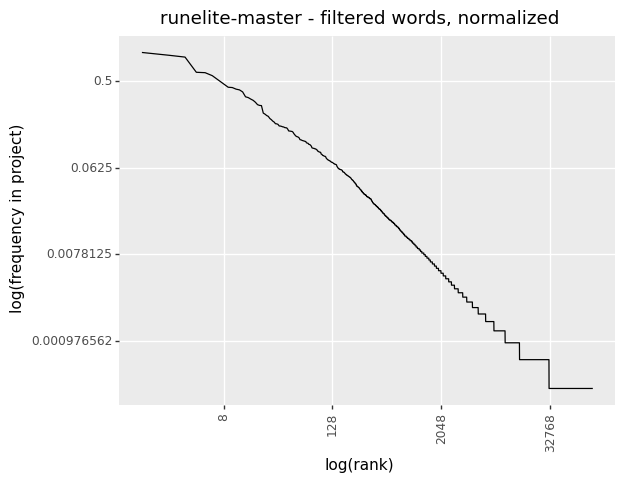

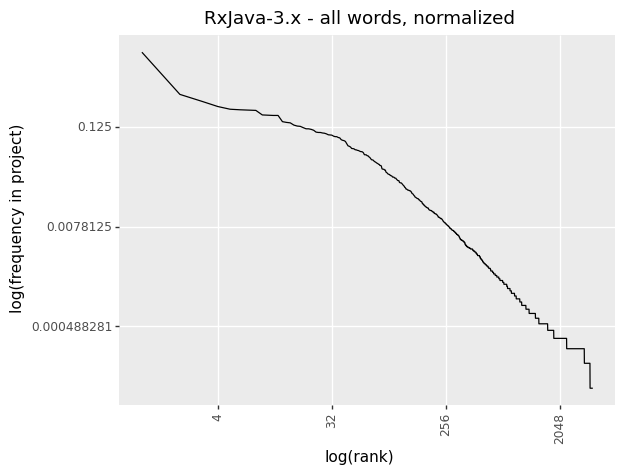

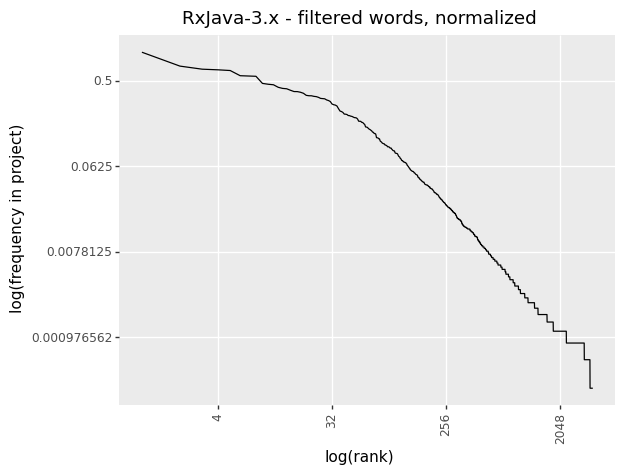

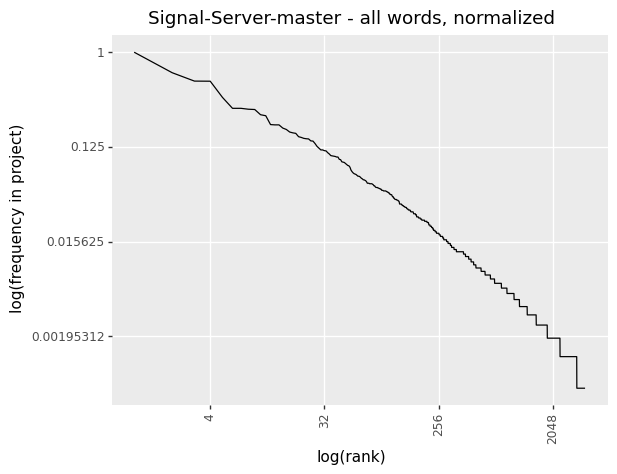

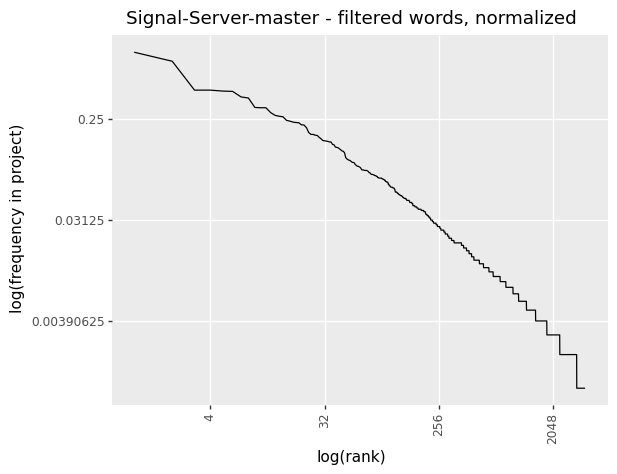

In [7]:
for file in word_analysis_files:
	csv = pd.read_csv(abspath(join(path, file)))
	most_frequent_words_normalized(csv, file[22:-4] + " - all words, normalized")
	filtered_words = csv[~csv['word'].isin(filtered_out_words)]
	most_frequent_words_normalized(filtered_words, file[22:-4] + " - filtered words, normalized")



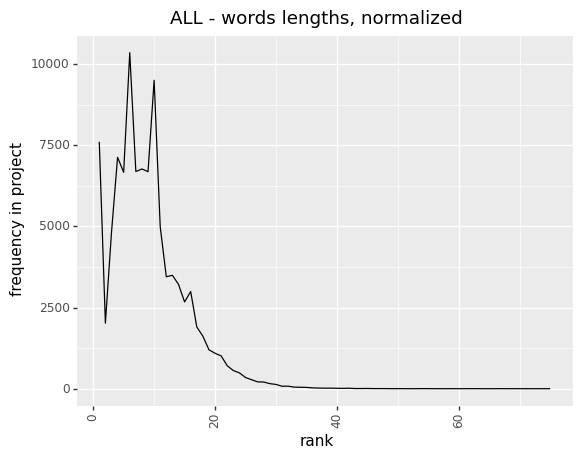

<ggplot: (135108320166)>
/n
<ggplot: (135109284837)>
/n
<ggplot: (135108887402)>
/n
<ggplot: (135108408272)>
/n
<ggplot: (135109138547)>
/n
<ggplot: (135108848782)>
/n
<ggplot: (135110069541)>
/n


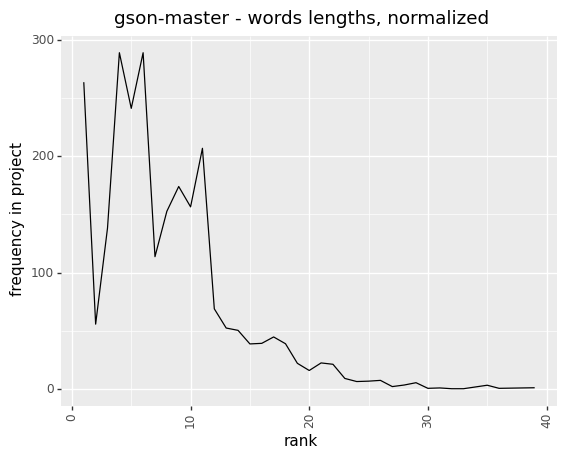

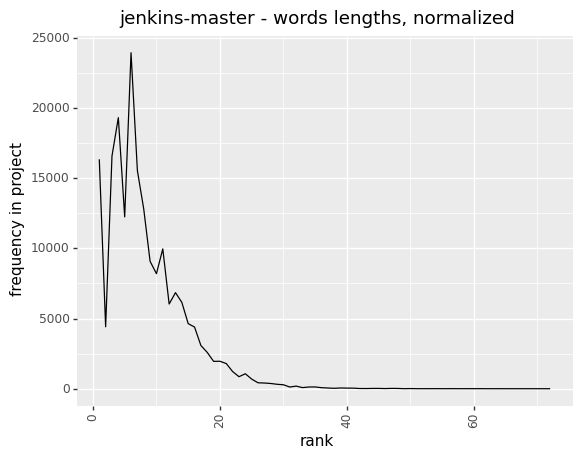

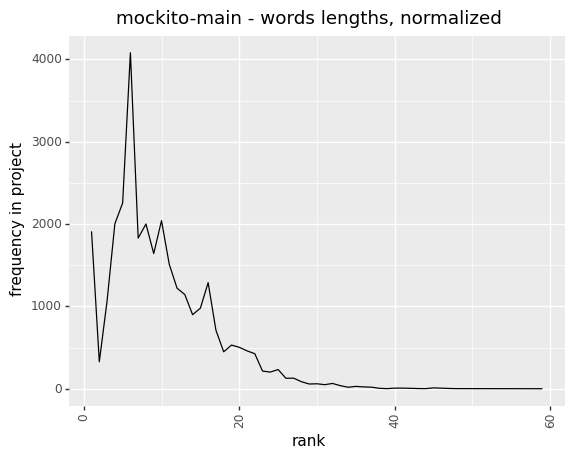

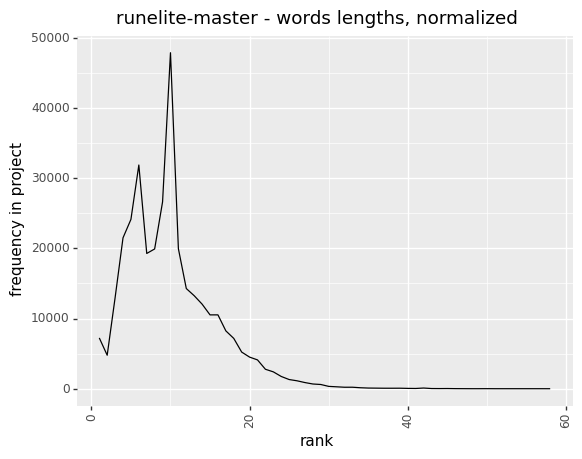

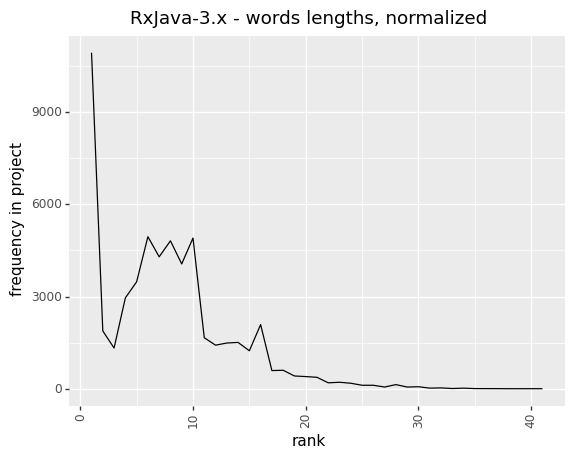

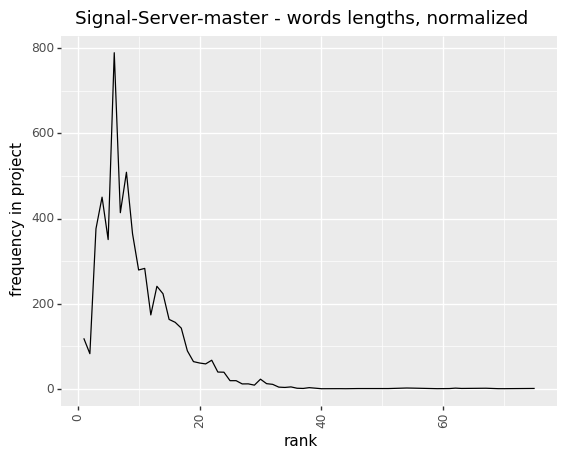

In [8]:
# Prints the frequency of each word in the corpus, divided by the frequency of the most common word
def most_frequent_words_lengts(df, title, n = None):
	if n is not None:
		df = df.nlargest(n, 'occurrences')
	most_frequent_word_length_occurrences = int(df[:1]['occurrences'])

	df['frequency'] = df['occurrences'] / most_frequent_word_length_occurrences
	data_length = n or df.shape[0]
	df.sort_values('frequency', inplace=True)
	df['rank'] = np.linspace(1, data_length, data_length)
	# TODO histogram with logarithmic bins with parameter for the base
	# high frequency -> short words?
	# boxplot per bin to see distribution per bin (+median)

	graph = ggplot(df) \
			+ labs(x="rank",
				   y="frequency in project",
				   title=title)\
			+ geom_line(aes(x='word_length', y='frequency'), stat='identity')\
			+ theme(axis_text_x=element_text(rotation=90))
	print(graph)
	print("/n")


for file in word_lengths_analysis_files:
	csv = pd.read_csv(abspath(join(path, file)))
	most_frequent_words_lengts(csv, file[24:-4] + " - words lengths, normalized")



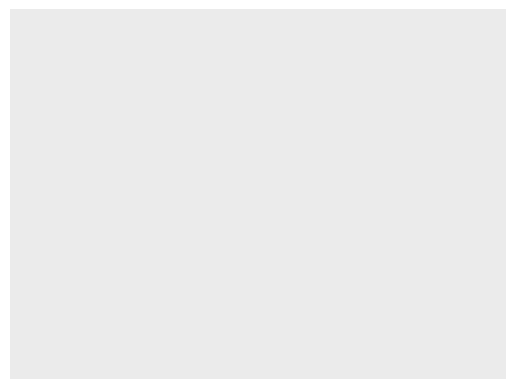

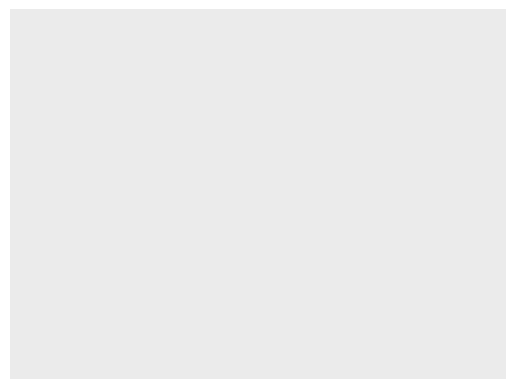

In [2]:
results_file = "analyzerResults_v2.csv"
# Read the data
results_df = pd.read_csv(abspath(join(path, results_file)))

results_df.name.unique()
print(
    ggplot(results_df)
    + labs(x="Text x", y="Test y")
    + geom_histogram(aes(x='name'), binwidth=100)
)